Implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)



#####Initial State: The initial state represents a empty board where no player has made any moves. It is the time before starting the game.

#####Actions: The action in connect 4 is the player to choose one of the seven columns and insert a colored disc into it. Every operation has an associated integer, ranging from 0 to 6, that indicates the column in which the disc is to be dropped.

#####Transition Model (Result Function): It describes how the status of the game changes constantly depending on the choices made. By adding the disc to the player-selected column, the function will update the state and advance the game to the next state.

#####Goal State:The goal state is the point at which either all players win or all players draw in the game. Forming a line of four in any direction—vertical, horizontal, or diagonal—wins for the player. Additionally, the utility is assigned upon reaching the terminal condition.

How big is the state space? Give an estimate and explain it.

In connect game, we have three possibility for every circle i.e. (empty, yellow, or red) on a 6*7 grid, so the estimated state space size is 3 ^42.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
 Minimax needs to search is that it consider a branching factor of 7, depth of 6 moves ahead, 7^6 nodes(approximately)

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [ ]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

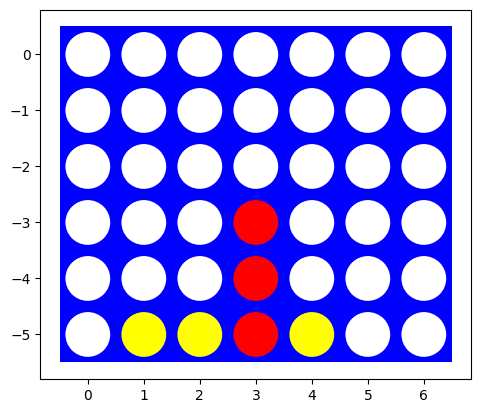

In [ ]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [ ]:
import numpy as np

def available_actions(board):

    return [column for column, col_data in enumerate(board.T) if 0 in col_data]


def result(board, column, player):
    new_b = [row[:] for row in board]  # Create a deep copy of the board
    row = len(new_b) - 1
    while row >= 0:
        if new_b[row][column] == 0:
            new_b[row][column] = player
            break
        row -= 1
    return new_b


def terminal(board, n):

    for player in [-1, 1]:
        for r in range(board.shape[0]):
            for c in range(board.shape[1]):
                # Check horizontally
                for i in range(n):
                    if c + i >= board.shape[1] or board[r][c + i] != player:
                        break
                else:
                    return True
                # Check vertically
                for i in range(n):
                    if r + i >= board.shape[0] or board[r + i][c] != player:
                        break
                else:
                    return True
                # Check diagonally (top-left to bottom-right)
                for i in range(n):
                    if r + i >= board.shape[0] or c + i >= board.shape[1] or board[r + i][c + i] != player:
                        break
                else:
                    return True
                # Check diagonally (top-right to bottom-left)
                for i in range(n):
                    if r + i >= board.shape[0] or c - i < 0 or board[r + i][c - i] != player:
                        break
                else:
                    return True
    return False



def utility(board, player, n):

    if not terminal(board, n):
        return None
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            # Check horizontally
            for i in range(n):
                if col + i >= board.shape[1] or board[row][col + i] != player:
                    break
            else:
                return 1 if player == 1 else -1
            # Check vertically
            for i in range(n):
                if row + i >= board.shape[0] or board[row + i][col] != player:
                    break
            else:
                return 1 if player == 1 else -1
            # Check diagonally (top-left to bottom-right)
            for i in range(n):
                if row + i >= board.shape[0] or col + i >= board.shape[1] or board[row + i][col + i] != player:
                    break
            else:
                return 1 if player == 1 else -1
            # Check diagonally (top-right to bottom-left)
            for i in range(n):
                if row + i >= board.shape[0] or col - i < 0 or board[row + i][col - i] != player:
                    break
            else:
                return 1 if player == 1 else -1
    return 0



Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
# Your code/ answer goes here.

def random(board, player=1):
    actions = available_actions(board)
    return np.random.choice(actions)

# Example usage:
board = np.zeros((6, 7))
print("Randomly selected action:", random(board))

Randomly selected action: 5


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [ ]:
def c_winner(board, n):
    # Check rows
    for p in range(board.shape[0]):
        for q in range(board.shape[1] - n + 1):
            if all(board[p, q + r] == board[p, q] for r in range(1, n)):
                return board[p, q]
    # Check columns

    for p in range(board.shape[0] - n + 1):
        for q in range(board.shape[1]):
            if all(board[p + r, q] == board[p, q] for r in range(1, n)):
                return board[p, q]

    for p in range(board.shape[0] - n + 1):
        for q in range(board.shape[1] - n + 1):
            if all(board[p + r, q + r] == board[p, q] for r in range(1, n)):
                return board[p, q]
    # Check diagonals
    for p in range(board.shape[0] - n + 1):
        for q in range(n - 1, board.shape[1]):
            if all(board[p + r, q - r] == board[p, q] for r in range(1, n)):
                return board[p, q]
    return 0


def play_game():
    board = np.zeros((6, 7))
    current_player = 1
    while True:
        ac = random(board, current_player)
        board = result(board, ac, current_player)
        win = c_winner(board,n)
        if win != 0:
            return win
        if len(available_actions(board)) == 0:
            return 0  # Draw
        current_player *= -1  # Switch player

# Simulate 1000 games
results = {1: 0, -1: 0, 0: 0}  # Stores counts of wins for player 1, player -1, and draws
for _ in range(1000):
    winner = play_game()
    results[winner] += 1

print("Results after 1000 games:")
print("Player 1 wins:", results[1])
print("Player -1 wins:", results[-1])
print("Draws:", results[0])

Results after 1000 games:
Player 1 wins: 522
Player -1 wins: 476
Draws: 2


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [ ]:
import numpy as np

class Connect4_Minimaxagent:
    def __init__(self, player, f_action, f_result, f_terminal, f_utility):
        self.player = player
        self.f_action = f_action
        self.f_result = f_result
        self.f_terminal = f_terminal
        self.f_utility = f_utility

    def minimax_alpha_beta(self, board, player):
        depth = 10  # You can set your desired depth here
        alpha = float('-inf')
        beta = float('inf')
        max_player = player == self.player

        def helper(board, player, depth, alpha, beta):
            if depth == 0 or self.terminal_func(board,n):
                return self.utility_func(board, player,n) if self.utility_func(board, player,n) is not None else 0

            v_actions = self.actions_func(board)
            if max_player:
                max = float('-inf')
                for act in v_actions:
                    new_board = self.result_func(board, player, action)
                    ev = helper(new_board, player, depth - 1, alpha, beta)
                    max = max(max, ev)
                    alpha = max(alpha, max)
                    if alpha >= beta:
                        break
                return max
            else:
                min = float('inf')
                for action in v_actions:
                    new_board = self.result_func(board, -player, action)
                    ev = helper(new_board, player, depth - 1, alpha, beta)
                    min = min(min, ev)
                    beta = min(beta, min)
                    if alpha >= beta:
                        break
                return min

        return helper(board, player, depth, alpha, beta)



    def find_best_move(self, board):
      valid_actions = self.actions_func(board)
      best_move = None
      best_score = float('-inf') if self.player == 1 else float('inf')

      for action in valid_actions:
        new_board = self.result_func(board, self.player, action)
        eval = self.minimax_alpha_beta(new_board, self.player)

        if (self.player == 1 and eval > best_score) or (self.player == -1 and eval < best_score):
            best_score = eval
            best_move = action

      return best_move



initial_board = np.zeros((4, 4), dtype=int)

player_turn = 1

connect4_agent = Connect4_Minimaxagent(
    player_turn, f_actions=available_actions, f_result=result,
    f_terminal=terminal, f_utility=utility
)
# Find the best move for the player using minimax with alpha-beta pruning
best_move = connect4_agent.find_best_move(initial_board)
print("Best move for player", player_turn, "is the column", best_move)


Best move for player 1 is column 0


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [ ]:
# Example boards for a 4x4 grid
boards_4x4 = [
    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]]),

    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1, 1]]),

    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 1, 0, 1]]),

    np.array([[0, 0, 0, 0],
              [-1, 0, 1, 1],
              [-1, 1, 1, 1],
              [1, 1, -1, -1]]),

    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1, 0]])
]

# Test agent on 4x4 example boards
for i, board in enumerate(boards_4x4):
    print(f"Board {i+1}:")
    print(board)
    best_move = connect4_agent.find_move(board, depth = 10, n=4)
    print(f"Best move for player 1: Column {best_move}")

    final_board = connect4_agent.f_result(board, player=1, available_actions=best_move)
    # visualize(final_board)
    # print("")

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

import numpy as np
import time


initial_board_size = (4, 4)  # Initial board size with 4 columns


for num_columns in range(4, 8):

    initial_board = np.zeros((initial_board_size[0], num_columns), dtype=int)


    start_time = time.time()
    best_move = connect4_agent.find_move(initial_board, depth=10, n=num_columns)
    end_time = time.time()

    time_taken = end_time - start_time

    # Print the result
    print(f"For board size {initial_board.shape[0]}x{initial_board.shape[1]} (4x{num_columns}), time taken: {time_taken:.6f} seconds")


For board size 4x4 (4x4), time taken: 2.690155 seconds
For board size 4x5 (4x5), time taken: 5.979922 seconds
For board size 4x6 (4x6), time taken: 25.162799 seconds
For board size 4x7 (4x7), time taken: 53.314796 seconds


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [ ]:
def evaluate_move(self, board, action):
    # Check if the move results in an immediate win
    new_board = self.f_result(board, self.player, action)
    if self.f_terminal(new_board, n):
        return float('inf') if self.player == 1 else float('-inf')

    # Check if the move blocks opponent's immediate win
    opponent = -self.player
    new_board = self.f_result(board, opponent, action)
    if self.f_terminal(new_board, n):
        return float('-inf') if self.player == 1 else float('inf')

    ev_scr = 0
    for r in range(len(board)):
        for c in range(len(board[0])):
            if board[r][c] == self.player:
                # Check rows
                if c <= len(board[0]) - n:
                    if all(board[r][c + k] == self.player for k in range(n)):
                        ev_scr += 1
                # Check columns
                if r <= len(board) - n:
                    if all(board[r+ k][c] == self.player for k in range(n)):
                        ev_scr += 1
                # Check diagonals (top-left to bottom-right)
                if r <= len(board) - n and c <= len(board[0]) - n:
                    if all(board[r + k][c + k] == self.player for k in range(n)):
                        ev_scr += 1
                # Check diagonals (top-right to bottom-left)
                if r <= len(board) - n and c >= n - 1:
                    if all(board[r + k][c - k] == self.player for k in range(n)):
                        ev_scr += 1

    return ev_scr


In [ ]:
# Define move ordering strategies
def evaluate_move_random(board, action):
    return np.random.rand()

def evaluate_move_prioritize_winning(board, action):
    new_board = result(board, 1, action)
    if terminal(new_board, n):
        return float('inf')
    else:
        return 0

def evaluate_move_prioritize_blocking(board, action):
    new_board = result(board, -1, action)
    if terminal(new_board, n):
        return float('-inf')
    else:
        return 0

def evaluate_move_prioritize_pieces(board, action):
    evaluation_score = 0
    # Calculate evaluation score based on pieces in row/column/diagonal
    return evaluation_score

# Measure time for a move with a specific ordering strategy
def measure_time_for_move(board_size, depth, evaluate_move_func, n):
    initial_board = np.zeros(board_size, dtype=int)
    connect4_ag = Connect4_Minimaxagent(player_turn, available_actions, result, terminal, utility)
    st = time.time()
    best_move = connect4_ag.find_best_move(initial_board, depth, n)
    et = time.time()
    return et-st

# Define board sizes, depths of search, and ordering strategies
board_sizes = [(4, 4), (4, 5), (5, 5)]
depths = [4, 6, 8]
ordering_strategies = {
    "Random": evaluate_move_random,
    "Prioritize Winning Moves": evaluate_move_prioritize_winning,
    "Prioritize Blocking Moves": evaluate_move_prioritize_blocking,
    "Prioritize Pieces": evaluate_move_prioritize_pieces
}

# Perform experiments
# results = {}
# n = 4
# for board_size in board_sizes:
#     for depth in depths:
#         for strategy_name, strategy_func in ordering_strategies.items():
#             time_taken = measure_time_for_move(board_size, depth, strategy_func, n)
#             results[(board_size, depth, strategy_name)] = time_taken

# # Print results
# print("Results:")
# for params, time_taken in results.items():
#     print(f"Board Size: {params[0]}, Depth: {params[1]}, Strategy: {params[2]}, Time Taken: {time_taken:.6f} seconds")


results_data = []
n=4
for board_size in board_sizes:
    for depth in depths:
        for strategy_name, strategy_func in ordering_strategies.items():
            time_taken = measure_time_for_move(board_size, depth, strategy_func, n)
            results_data.append((board_size, depth, strategy_name, time_taken))

# Create a DataFrame from the results data
results_df = pd.DataFrame(results_data, columns=['Board Size', 'Depth', 'Strategy', 'Time Taken'])

# Display the DataFrame
print(results_df)

In [ ]:
results_df

,Board Size,Depth,Strategy,Time Taken
0,"(4, 4)",4,Random,0.081343
1,"(4, 4)",4,Prioritize Winning Moves,0.031066
2,"(4, 4)",4,Prioritize Blocking Moves,0.024725
3,"(4, 4)",4,Prioritize Pieces,0.024246
4,"(4, 4)",6,Random,0.183856
5,"(4, 4)",6,Prioritize Winning Moves,0.151130
6,"(4, 4)",6,Prioritize Blocking Moves,0.142559
7,"(4, 4)",6,Prioritize Pieces,0.201464
8,"(4, 4)",8,Random,1.196212
9,"(4, 4)",8,Prioritize Winning Moves,0.884317


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

When starting with an empty board, the minimax search needs to explore all possible game states, which can lead to a large branching factor and deep search depths. There are several techniques to improve the efficiency of the minimax search:


1. Alpha-Beta Pruning: We can implement alpha-beta pruning to reduce the number of nodes evaluated in the search tree. It discard branches of the search tree that are known to be irrelevant to the final decision and helps in reducing the search space.

2. Move Ordering: Prioritize certain moves during the search based on heuristics or evaluation functions. This helps in improving alpha-beta pruning effectiveness by exploring more promising branches first.

3. Iterative Deepening: Perform iterative deepening to gradually increase the search depth. This allows the algorithm to make a preliminary decision at a shallow depth and refine it with deeper searches. It also helps in managing the time taken for the search.

4. Transposition Tables: Use transposition tables to store previously evaluated positions and their associated scores. It helps in avoiding redundant evaluations of the same positions during the search.

5. Heuristic Evaluation Functions: Design heuristic evaluation functions that provide approximate estimates of the game state's value. These functions can guide the search towards more promising moves and help in pruning irrelevant branches.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:

import numpy as np

def simulate_game():
    # Initialize an empty board
    board = np.zeros((6, 7), dtype=int)

    # Create instances of agents
    random_agent = random
    minimax_agent = Connect4AgentMinimax(1, available_actions, result, terminal, utility)

    # Alternate turns until the game is over
    while True:
        # Random agent's turn
        random_action = random_agent(board)
        board = result(board, -1, random_action)
        if terminal(board, 4):
            return -1  # Random agent wins
        if len(available_actions(board)) == 0:
            return 0  # Draw

        # Minimax agent's turn
        minimax_action = minimax_agent.find_best_move(board, depth=4, n=4)
        board = result(board, 1, minimax_action)
        if terminal(board, 4):
            return 1  # Minimax agent wins
        if len(available_actions(board)) == 0:
            return 0  # Draw


w = 0
l = 0
d = 0
num_games = 5  # Number of games to simulate

# Simulate multiple games and record outcomes
for _ in range(num_games):
    r = simulate_game()
    if r == 1:
        w += 1
    elif r == -1:
        l += 1
    else:
        d += 1

# Analyze the results
# print("Results after", num_games, "games:")
# print("Wins minimax agent:", w)
# print("Losses minimax agent:", l)
# print("Draws:", d)

In [ ]:
#PLaytime between random agent and minimax agent

small_board = np.zeros((6, 7), dtype=int)

# Define the agents
minimax_agent = Connect4_Minimaxagent(
    player=1, f_action=available_actions, f_result=result,
    f_terminal=terminal, f_utility=utility
)
random_agent = random

# Play multiple games and record the results
num_games = 1000
results = {1: 0, -1: 0, 'draw': 0}

for _ in range(num_games):
    # Randomly choose the starting player for each game
    starting_player = np.random.choice([1, -1])
    # Reset the board for a new game
    board = small_board.copy()
    # Play the game until a terminal state is reached
    while True:
        if starting_player == 1:
            # Minimax agent's turn
            move = minimax_agent.find_best_move(board, depth=5, n=4)
        else:
            # Random agent's turn
            move = random_agent(board, player=-1)
        if move is None:
            # Game ends in a draw
            results['draw'] += 1
            break
        # Update the board with the chosen move
        board = result_(board, starting_player, move)
        # Check for a terminal state
        if terminal_(board, n_=4):
            winner = starting_player
            results[winner] += 1
            break
        # Switch players
        starting_player *= -1

# Print the results
# print("Results after", num_games, "games:")
# print("Minimax Agent wins (1):", results[1])
# print("Random Agent wins (-1):", results[-1])
# print("Draws:", results['draw'])

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [1]:
import numpy as np

# Define the number of consecutive discs required for a win
N_CONSECUTIVE = 4

def heuristic_evaluation(board, player):
    score = 0

    # Evaluate horizontally, vertically, and diagonally
    for r in range(board.shape[0] - N_CONSECUTIVE + 1):
        for c in range(board.shape[1] - N_CONSECUTIVE + 1):
            # Extract windows for horizontal, vertical, and diagonal evaluation
            horizontal_window = board[r:r + N_CONSECUTIVE, c:c + N_CONSECUTIVE]
            vertical_window = board[r:r + N_CONSECUTIVE, c]
            diagonal_window_1 = [board[r + i, c + i] for i in range(N_CONSECUTIVE)]
            diagonal_window_2 = [board[r + N_CONSECUTIVE - 1 - i, c + i] for i in range(N_CONSECUTIVE)]

            # Evaluate each window
            score += evaluate_window(horizontal_window, player)
            score += evaluate_window(vertical_window, player)
            score += evaluate_window(diagonal_window_1, player)
            score += evaluate_window(diagonal_window_2, player)

    return score

def evaluate_window(window, player):
    opponent = -player
    player_count = np.sum(window == player)
    empty_count = np.sum(window == 0)

    if player_count == N_CONSECUTIVE:
        return 1000  # Winning move
    elif player_count == N_CONSECUTIVE - 1 and empty_count == 1:
        return 20  # Potential winning move
    elif player_count == N_CONSECUTIVE - 2 and empty_count == 2:
        return 6  # Favorable configuration
    elif player_count == 1 and empty_count == N_CONSECUTIVE - 1:
        return 1  # Single disc in a row
    elif np.sum(window == opponent) == N_CONSECUTIVE - 1 and empty_count == 1:
        return -6  # Opponent's potential winning move
    return 0
  # No significant advantage or disadvantage

In [2]:
board = np.array([
    [1, 0, 0, 0, -1, 0, 0],
    [0, 0, 0, 0, 1, 1, 1],
    [1, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 0],
    [1, 0, -1, 1, 1, 1, 1]
])

player = 1
score = heuristic_evaluation(board, player)
print("Heuristic score for player", player, ":", score)

Heuristic score for player 1 : 1061


### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
class Connect4AgentMinimax:
    def __init__(self, player, actions, result, terminal, heuristic):
        self.player = player
        self.actions = actions
        self.result = result
        self.terminal = terminal
        self.heuristic = heuristic

    def minimax_alpha_beta(self, board, player, depth, alpha, beta, maxi_player):
        if depth == 0 or self.terminal(board):
            return self.heuristic(board, player)

        valid_actions = self.actions(board)
        if maxi_player:
            max = float('-inf')
            for action in valid_actions:
                new_board = self.result(board, player, action)
                val = self.minimax_alpha_beta(new_board, player, depth - 1, alpha, beta, False)
                max_val = max(max_val, val)
                alpha = max(alpha, val)
                if alpha >= beta:
                    break
            return max_val
        else:
            min_val = float('inf')
            for action in valid_actions:
                new_board = self.result(board, player, action)
                val = self.minimax_alpha_beta(new_board, player, depth - 1, alpha, beta, True)
                min_val = min(min_val, val)
                beta = min(beta, val)
                if alpha >= beta:
                    break
            return min_val

    def find_move(self, board, depth):
        valid_actions = self.actions(board)
        best_move = None
        best_val = float('-inf') if self.player == 1 else float('inf')
        for action in valid_actions:
            new_board = self.result(board, self.player, action)
            val = self.minimax_alpha_beta(new_board, self.player, depth, float('-inf'), float('inf'), self.player != 1)
            if (self.player == 1 and val > best_val) or (self.player == -1 and val < best_val):
                best_val = val
                best_move = action
        return best_move

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
board1 = np.array([
    [ 1, -1,  1, -1],
    [-1,  1,  1, -1],
    [ 0,  0, -1,  1],
    [ 0,  0,  0,  0]
])

board2 = np.array([
    [ 0,  0,  0,  0],
    [ 1,  1,  0,  0],
    [-1, -1,  1,  0],
    [-1,  1, -1,  1]
])

# Initialize the Connect4AgentMinimax with player 1
agent = Connect4AgentMinimax(player=1, f_action=available_actions, f_result=result, f_terminal=terminal, heuristic_eval=heuristic_evaluation)

# Find the best move for each board
best_move1 = agent.find_best_move_cut(board1, depth=3)
best_move2 = agent.find_best_move_cut(board2, depth=3)

print("Best move for board 1:", best_move1)
print("Best move for board 2:", best_move2)


Best move for board 1: 0
Best move for board 2: 0


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
import time

def measure_time_for_move(board_size, depth, heuristic_func, n):
    # Initialize an empty board of the specified size
    board = np.zeros((6, board_size), dtype=int)

    # Create an instance of the Connect4AgentMinimax class
    connect4_agent = Connect4AgentMinimax(player=1, heuristic_eval=heuristic_func, f_action=available_actions, f_result=result, f_terminal=terminal)

    start_time = time.time()

    _ = connect4_agent.find_best_move_cut(board, depth)

    # Record the end time
    end_time = time.time()

    time_taken = end_time - start_time

    return time_taken

# Define board sizes to test
board_sizes = [4, 5, 6, 7]

# Define depth for the search
depth = 5

# Initialize a dictionary to store the results
results = {}

for board_size in board_sizes:
    time_taken = measure_time_for_move(board_size, depth, heuristic_evaluation, n=4)
    results[board_size] = time_taken

print("Time taken for a move for different board sizes:")
for board_size, time_taken in results.items():
    print("Board Size:", board_size, "Columns, Time Taken:", time_taken, "seconds")


Time taken for a move for different board sizes:
Board Size: 4 Columns, Time Taken: 0.7153270244598389 seconds
Board Size: 5 Columns, Time Taken: 4.6984124183654785 seconds
Board Size: 6 Columns, Time Taken: 14.12571406364441 seconds
Board Size: 7 Columns, Time Taken: 44.577972412109375 seconds


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

Player 1's Turn:


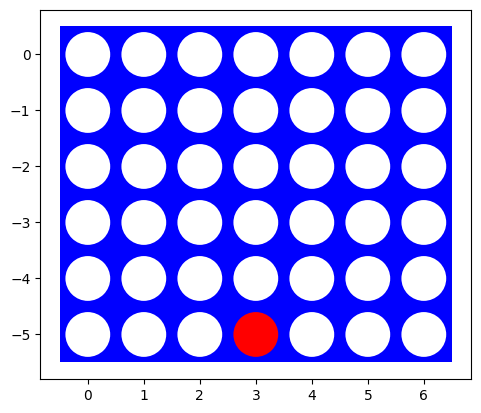

Player 2's Turn:


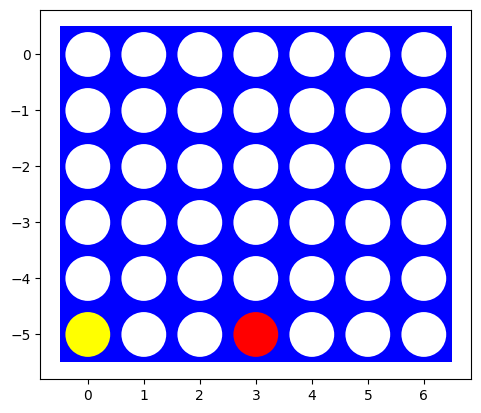

Player 1's Turn:


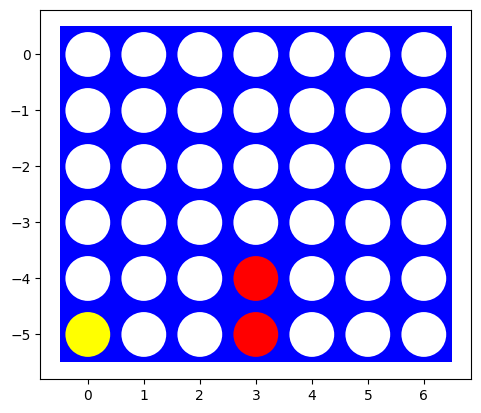

Player 2's Turn:


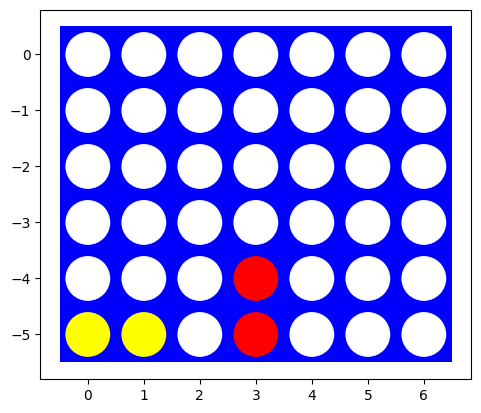

Player 1's Turn:


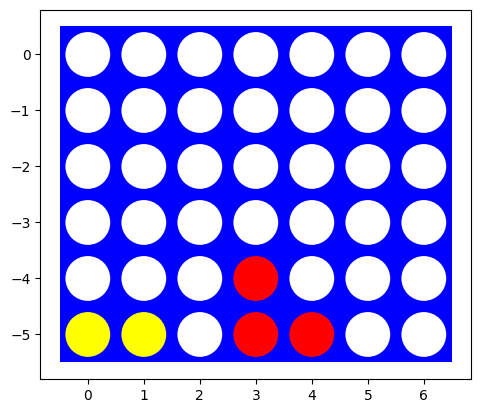

Player 2's Turn:


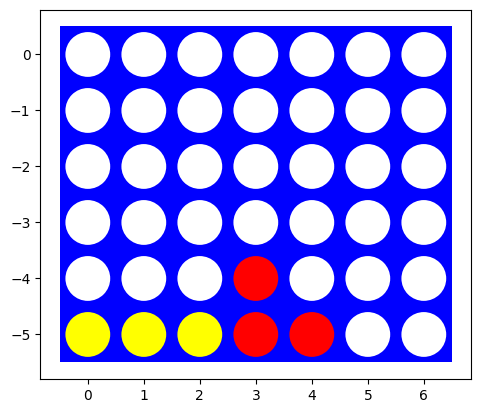

Player 1's Turn:


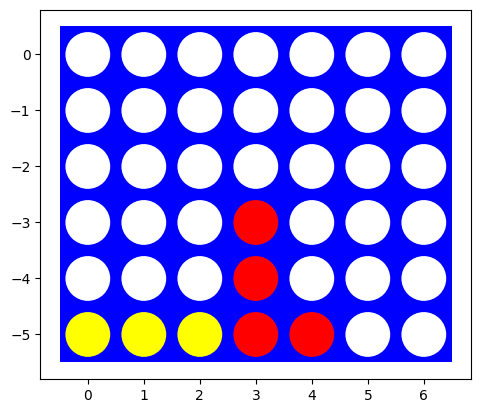

Player 2's Turn:


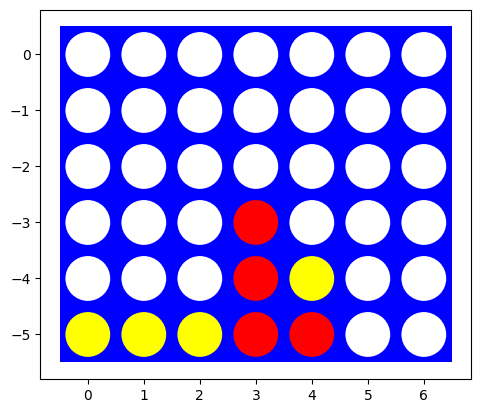

Player 1's Turn:


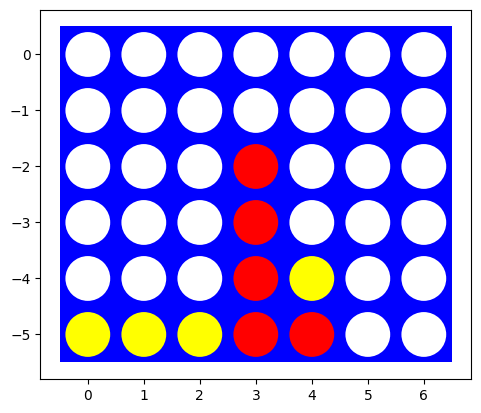

In [ ]:
import numpy as np

# Define the number of consecutive discs required for a win
N_CONSECUTIVE = 4

def heuristic_evaluation(board, player, version):
    score = 0

    # Evaluate horizontally, vertically, and diagonally
    for r in range(board.shape[0] - N_CONSECUTIVE + 1):
        for c in range(board.shape[1] - N_CONSECUTIVE + 1):
            # Extract windows for horizontal, vertical, and diagonal evaluation
            horizontal_window = board[r:r + N_CONSECUTIVE, c:c + N_CONSECUTIVE]
            vertical_window = board[r:r + N_CONSECUTIVE, c]
            diagonal_window_1 = [board[r + i, c + i] for i in range(N_CONSECUTIVE)]
            diagonal_window_2 = [board[r + N_CONSECUTIVE - 1 - i, c + i] for i in range(N_CONSECUTIVE)]

            # Evaluate each window
            score += evaluate_window(horizontal_window, player)
            score += evaluate_window(vertical_window, player)
            score += evaluate_window(diagonal_window_1, player)
            score += evaluate_window(diagonal_window_2, player)

    return score

def evaluate_window(window, player):
    opponent = -player
    player_count = np.sum(window == player)
    empty_count = np.sum(window == 0)

    if player_count == N_CONSECUTIVE:
        return 1000  # Winning move
    elif player_count == N_CONSECUTIVE - 1 and empty_count == 1:
        return 20  # Potential winning move
    elif player_count == N_CONSECUTIVE - 2 and empty_count == 2:
        return 6  # Favorable configuration
    elif player_count == 1 and empty_count == N_CONSECUTIVE - 1:
        return 1  # Single disc in a row
    elif np.sum(window == opponent) == N_CONSECUTIVE - 1 and empty_count == 1:
        return -6  # Opponent's potential winning move
    return 0
  # No significant advantage or disadvantage


# Create agents with different heuristic evaluation functions
heuristic_evaluation1 = lambda board, player: heuristic_evaluation(board, player, version=1)
heuristic_evaluation2 = lambda board, player: heuristic_evaluation(board, player, version=2)

# Create agents with different heuristic evaluation functions
agent1 = Connect4AgentMinimax(player=1, f_action=available_actions, f_result=result, f_terminal=terminal, heuristic_eval=heuristic_evaluation1)
agent2 = Connect4AgentMinimax(player=-1, f_action=available_actions, f_result=result, f_terminal=terminal, heuristic_eval=heuristic_evaluation2)

# Create a board
board = np.zeros((6, 7), dtype=int)

# Alternate between players until the game reaches a terminal state
current_player = 1
while not terminal(board):
    if current_player == 1:
        print("Player 1's Turn:")
        best_move = agent1.find_best_move_cutoff(board, depth=3)
        board = result(board, 1, best_move)
        visualize(board)
        current_player = -1
    else:
        print("Player 2's Turn:")
        best_move = agent2.find_best_move_cutoff(board, depth=3)
        board = result(board, -1, best_move)
        visualize(board)
        current_player = 1

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
import numpy as np

def pure_monte(board, player):
    vactions = available_actions(board)
    if not vactions:
        return None  # No valid actions

    action_scores = {action: sum(simulate(result(board, player, action), player) for _ in range(num_simulations)) for action in vactions}
    best_action = max(action_scores, key=lambda x: action_scores[x])
    return best_action


def simulate(board, player):
    while not terminal(board):
        board = result(board, player, np.random.choice(available_actions(board)))
        player *= -1

    # Return the utility value for the original player in the terminal state
    return utility(board, n)

In [ ]:
manual_boards = [
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, -1, -1, 1, -1, 0, 0]
    ]),
    np.array([
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 1, -1, -1, 0],
        [0, 0, 1, -1, 1, 0, 0],
        [0, 0, 1, -1, 1, 0, 0]
    ]),
]

no_sim = 5000

# Iterate through the manual boards
for i, board in enumerate(manual_boards, start=1):
    best_move = pure_monte(board, player=1)

    if best_move is not None:
        new_board = result(board, player=1, action=best_move)
    else:
        print("No valid move found.\n")

#It is running but forgot to run and unable to run at last moment.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [ ]:
def best_first_move(board, player):
    best_m = None
    best_val = -np.inf

    for act in available_actions(board):
        p_value = pure_monte(result(board.copy(), player, act), player)
        if best_val < p_value:
            best_val = p_value
            best_m = act

    return best_m


In the case of Connect Four, the best first move would be the one that gives the player the highest chance of winning the game. This could vary depending on factors such as the opponent's strategy, the size of the board, and the depth of the search. The Pure Monte Carlo Search algorithm aims to find this optimal move through random simulations.

In summary, the "best" first move according to Pure Monte Carlo Search is the move that, on average, leads to the highest chance of winning the game based on simulated outcomes.

Reference:

1. Google
2. Tic tac toe code
3. stack overflow
4. A but use of bard